### This Notebook loads data, joins, preprocesses, and saves the processed data as CSV

In [2]:
import numpy as np 
import pandas as pd 
import datetime as dt
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
from sklearn.model_selection import train_test_split

In [4]:
trnp = train_p = pd.read_csv("./input/Train-1542865627584.csv")
trnb = train_b=pd.read_csv("./input/Train_Beneficiarydata-1542865627584.csv")
trni = train_i=pd.read_csv("./input/Train_Inpatientdata-1542865627584.csv")
trno = train_o=pd.read_csv("./input/Train_Outpatientdata-1542865627584.csv")

tstp = test_p=pd.read_csv("./input/Test-1542969243754.csv")
tstb = test_b=pd.read_csv("./input/Test_Beneficiarydata-1542969243754.csv")
tsti = test_i=pd.read_csv("./input/Test_Inpatientdata-1542969243754.csv")
tsto = test_o=pd.read_csv("./input/Test_Outpatientdata-1542969243754.csv")

In [5]:

def col_clean(df):
    df.columns = df.columns.str.lower()
    df.columns = df.columns.str.replace(' ','',regex=True)
    df.columns=df.columns.str.replace('[^\w]','_',regex=True)
    
dfs=[trnp,trnb,trni,trno,tstp,tstb,tsti,tsto]

for i in dfs:
    col_clean(i)

### Exploring Benefiaciary Data

In [6]:
trnb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 138556 entries, 0 to 138555
Data columns (total 25 columns):
 #   Column                           Non-Null Count   Dtype 
---  ------                           --------------   ----- 
 0   beneid                           138556 non-null  object
 1   dob                              138556 non-null  object
 2   dod                              1421 non-null    object
 3   gender                           138556 non-null  int64 
 4   race                             138556 non-null  int64 
 5   renaldiseaseindicator            138556 non-null  object
 6   state                            138556 non-null  int64 
 7   county                           138556 non-null  int64 
 8   noofmonths_partacov              138556 non-null  int64 
 9   noofmonths_partbcov              138556 non-null  int64 
 10  chroniccond_alzheimer            138556 non-null  int64 
 11  chroniccond_heartfailure         138556 non-null  int64 
 12  chroniccond_kidn

### Gender Distribution

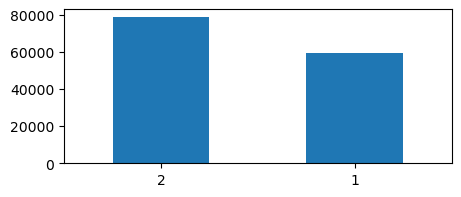

In [7]:
trnb['gender'].value_counts().plot(kind = 'bar', rot = 0, figsize=(5, 2));

### State distribution

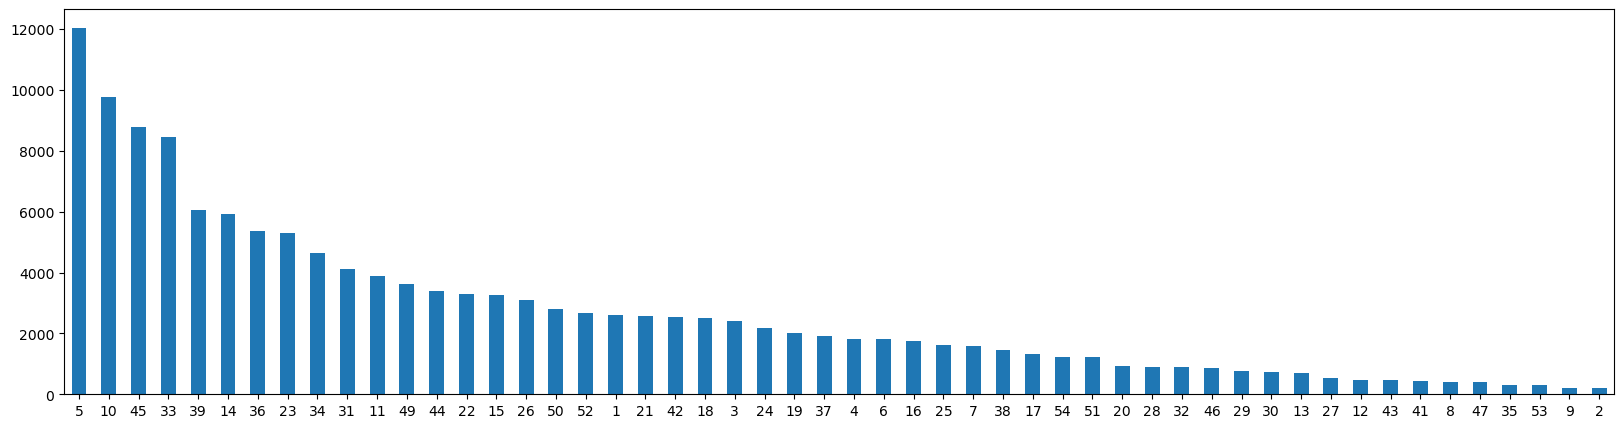

In [8]:
trnb['state'].value_counts().plot(kind = 'bar', rot = 0, figsize=(20, 5));

### Race distribution

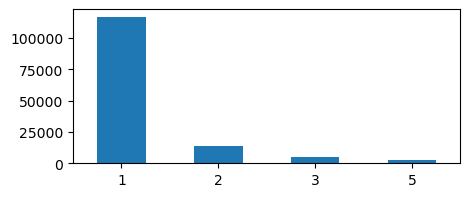

In [9]:
trnb['race'].value_counts().plot(kind = 'bar', rot = 0, figsize=(5, 2));

In [10]:
trnb['dod'].isna().sum()

137135

### Chronic condition Distribution

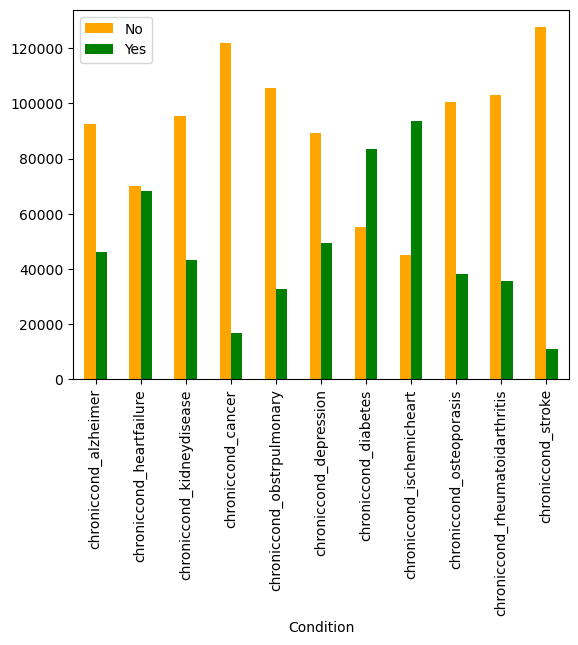

In [11]:
chronic_conditions = ['chroniccond_alzheimer', 'chroniccond_heartfailure', 'chroniccond_kidneydisease', 
                      'chroniccond_cancer', 'chroniccond_obstrpulmonary', 'chroniccond_depression', 
                      'chroniccond_diabetes', 'chroniccond_ischemicheart', 'chroniccond_osteoporasis',                      
                      'chroniccond_rheumatoidarthritis', 'chroniccond_stroke']

chronic_df = pd.DataFrame({'Condition':[], 'No':[],'Yes':[]})
for codn in chronic_conditions:
    temp_df = trnb[codn].value_counts().reset_index()
    chronic_df.loc[len(chronic_df.index)] = [codn, temp_df.loc[temp_df['index'] == 2][codn].iloc[0], temp_df.loc[temp_df['index'] == 1][codn].iloc[0]]
chronic_df = chronic_df.set_index('Condition')
chronic_df.plot(kind = 'bar', color = ('orange','green'), rot = 90); 

### Count of noofmonths_partacov and noofmonths_partbcov
As majority of the month in the data is 12 for both. it might not be useful in further analysis.

In [12]:
print(trnb['noofmonths_partacov'].value_counts())
print(trnb['noofmonths_partbcov'].value_counts())

12    137389
0       1000
6         38
11        28
8         26
10        18
7         16
4         13
5          8
9          7
3          5
2          5
1          3
Name: noofmonths_partacov, dtype: int64
12    136902
0        675
6        282
10       150
11       143
9        122
8         71
7         63
5         50
4         35
3         27
2         19
1         17
Name: noofmonths_partbcov, dtype: int64


### Renal disease and Kidney disease count

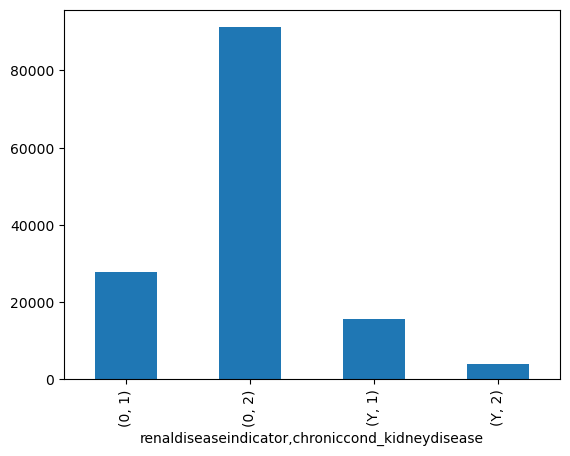

In [13]:
trnb.groupby(['renaldiseaseindicator','chroniccond_kidneydisease'])['beneid'].count().plot(kind='bar');

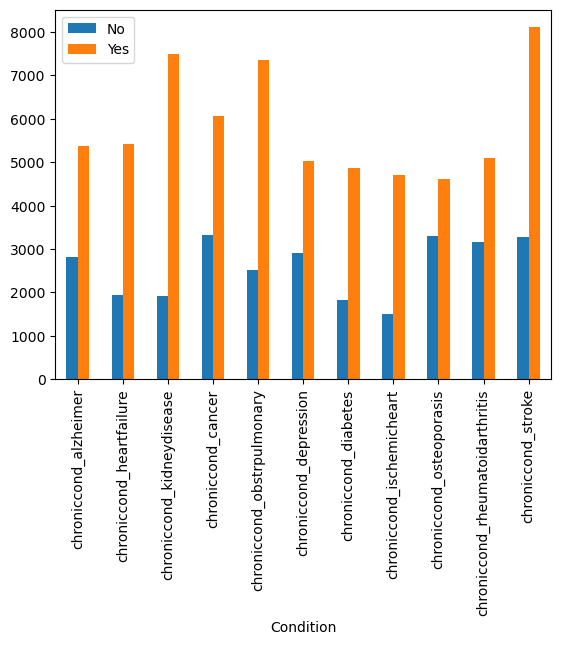

In [14]:
df_ip = pd.DataFrame({'Condition':[], 'No':[],'Yes':[]})
for codn in chronic_conditions:
    temp_df = trnb[[codn, 'ipannualreimbursementamt']].groupby(codn).mean().reset_index()
    df_ip.loc[len(df_ip.index)] = [codn, temp_df.loc[temp_df[codn] == 2]['ipannualreimbursementamt'].iloc[0], temp_df.loc[temp_df[codn] == 1]['ipannualreimbursementamt'].iloc[0]]
df_ip = df_ip.set_index('Condition')
df_ip.plot(kind = 'bar', rot = 90); 

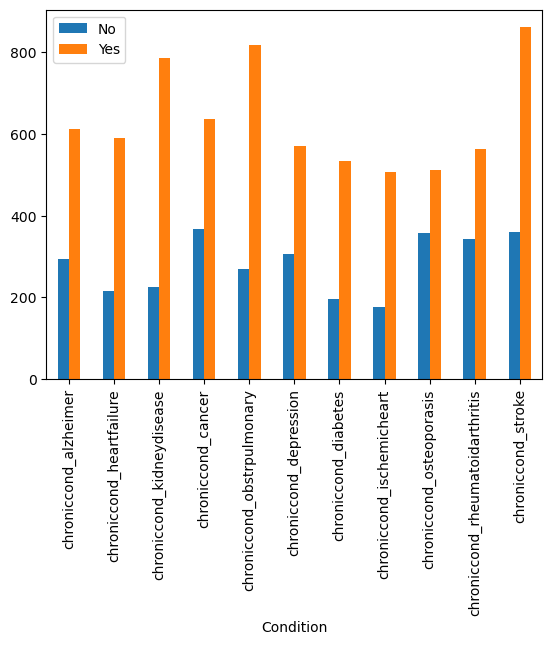

In [15]:
df_ip_deduc = pd.DataFrame({'Condition':[], 'No':[],'Yes':[]})
for codn in chronic_conditions:
    temp_df = trnb[[codn, 'ipannualdeductibleamt']].groupby(codn).mean().reset_index()
    df_ip_deduc.loc[len(df_ip_deduc.index)] = [codn, temp_df.loc[temp_df[codn] == 2]['ipannualdeductibleamt'].iloc[0], temp_df.loc[temp_df[codn] == 1]['ipannualdeductibleamt'].iloc[0]]
df_ip_deduc = df_ip_deduc.set_index('Condition')
df_ip_deduc.plot(kind = 'bar', rot = 90);

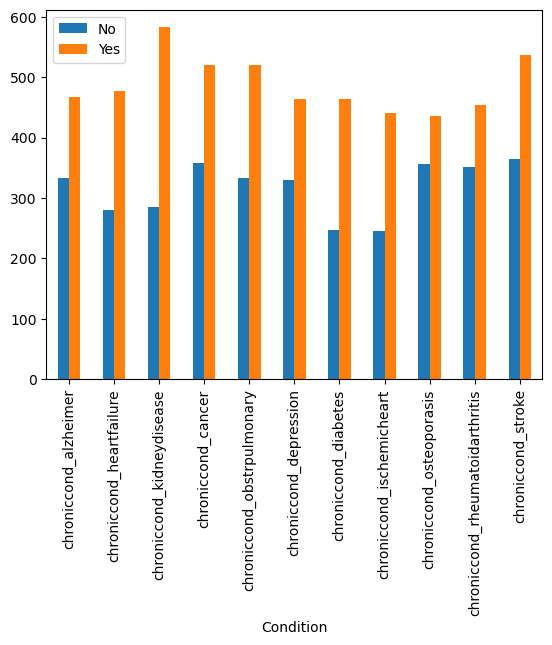

In [16]:
df_op_de = pd.DataFrame({'Condition':[], 'No':[],'Yes':[]})
for codn in chronic_conditions:
    temp_df = trnb[[codn, 'opannualdeductibleamt']].groupby(codn).mean().reset_index()
    df_op_de.loc[len(df_op_de.index)] = [codn, temp_df.loc[temp_df[codn] == 2]['opannualdeductibleamt'].iloc[0], temp_df.loc[temp_df[codn] == 1]['opannualdeductibleamt'].iloc[0]]
df_op_de = df_op_de.set_index('Condition')
df_op_de.plot(kind = 'bar', rot = 90);

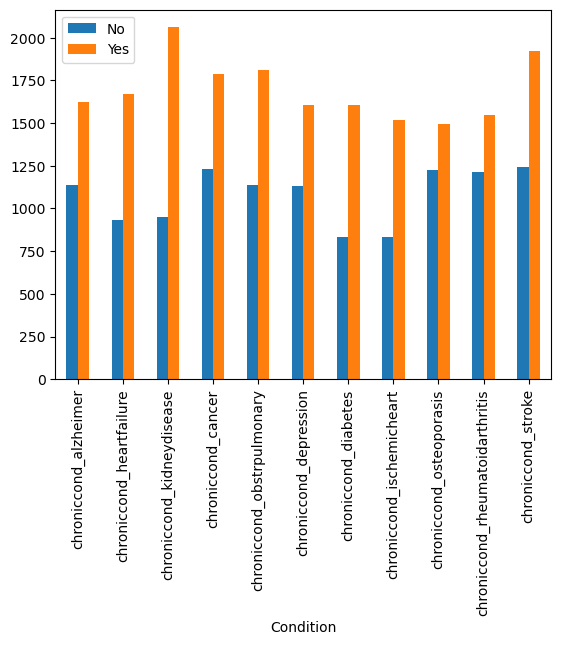

In [17]:
df_op_re = pd.DataFrame({'Condition':[], 'No':[],'Yes':[]})
for codn in chronic_conditions:
    temp_df = trnb[[codn, 'opannualreimbursementamt']].groupby(codn).mean().reset_index()
    df_op_re.loc[len(df_op_re.index)] = [codn, temp_df.loc[temp_df[codn] == 2]['opannualreimbursementamt'].iloc[0], temp_df.loc[temp_df[codn] == 1]['opannualreimbursementamt'].iloc[0]]
df_op_re = df_op_re.set_index('Condition')
df_op_re.plot(kind = 'bar', rot = 90);

In [18]:
train_mergeOPB=pd.merge(trno,trnp,on='provider',how='left')
train_mergeOPB=pd.merge(train_mergeOPB,trnb,on='beneid')

In [19]:
train_mergeOPB.head()

,beneid,claimid,claimstartdt,claimenddt,provider,inscclaimamtreimbursed,attendingphysician,operatingphysician,otherphysician,clmdiagnosiscode_1,...,chroniccond_depression,chroniccond_diabetes,chroniccond_ischemicheart,chroniccond_osteoporasis,chroniccond_rheumatoidarthritis,chroniccond_stroke,ipannualreimbursementamt,ipannualdeductibleamt,opannualreimbursementamt,opannualdeductibleamt
0,BENE11002,CLM624349,2009-10-11,2009-10-11,PRV56011,30,PHY326117,NaN,NaN,78943,...,2,2,2,2,2,2,0,0,30,50
1,BENE11003,CLM189947,2009-02-12,2009-02-12,PRV57610,80,PHY362868,NaN,NaN,6115,...,2,2,1,2,2,2,0,0,90,40
2,BENE11003,CLM438021,2009-06-27,2009-06-27,PRV57595,10,PHY328821,NaN,NaN,2723,...,2,2,1,2,2,2,0,0,90,40
3,BENE11004,CLM121801,2009-01-06,2009-01-06,PRV56011,40,PHY334319,NaN,NaN,71988,...,2,1,1,1,1,2,0,0,1810,760
4,BENE11004,CLM150998,2009-01-22,2009-01-22,PRV56011,200,PHY403831,NaN,NaN,82382,...,2,1,1,1,1,2,0,0,1810,760


In [20]:
train_mergeOPB['inpt']=0

In [21]:
train_mergeIPB=pd.merge(trni,trnp,on='provider',how='left')
train_mergeIPB=pd.merge(train_mergeIPB,trnb,on='beneid')

In [22]:
train_mergeIPB['inpt']=1

In [23]:
train_merge=pd.merge(train_mergeOPB,train_mergeIPB,how='outer',left_on=['beneid', 'claimid', 'claimstartdt', 'claimenddt', 'provider',
       'inscclaimamtreimbursed', 'attendingphysician', 'operatingphysician',
       'otherphysician', 'clmdiagnosiscode_1', 'clmdiagnosiscode_2',
       'clmdiagnosiscode_3', 'clmdiagnosiscode_4', 'clmdiagnosiscode_5',
       'clmdiagnosiscode_6', 'clmdiagnosiscode_7', 'clmdiagnosiscode_8',
       'clmdiagnosiscode_9', 'clmdiagnosiscode_10', 'clmprocedurecode_1',
       'clmprocedurecode_2', 'clmprocedurecode_3', 'clmprocedurecode_4',
       'clmprocedurecode_5', 'clmprocedurecode_6', 'deductibleamtpaid',
       'clmadmitdiagnosiscode', 'potentialfraud', 'dob', 'gender',
       'race', 'renaldiseaseindicator', 'state', 'county',
       'noofmonths_partacov', 'noofmonths_partbcov', 'chroniccond_alzheimer',
       'chroniccond_heartfailure', 'chroniccond_kidneydisease',
       'chroniccond_cancer', 'chroniccond_obstrpulmonary',
       'chroniccond_depression', 'chroniccond_diabetes',
       'chroniccond_ischemicheart', 'chroniccond_osteoporasis',
       'chroniccond_rheumatoidarthritis', 'chroniccond_stroke',
       'ipannualreimbursementamt', 'ipannualdeductibleamt',
       'opannualreimbursementamt', 'opannualdeductibleamt',
       'inpt','dod'], right_on=['beneid', 'claimid', 'claimstartdt', 'claimenddt', 'provider',
       'inscclaimamtreimbursed', 'attendingphysician', 'operatingphysician',
       'otherphysician', 'clmdiagnosiscode_1', 'clmdiagnosiscode_2',
       'clmdiagnosiscode_3', 'clmdiagnosiscode_4', 'clmdiagnosiscode_5',
       'clmdiagnosiscode_6', 'clmdiagnosiscode_7', 'clmdiagnosiscode_8',
       'clmdiagnosiscode_9', 'clmdiagnosiscode_10', 'clmprocedurecode_1',
       'clmprocedurecode_2', 'clmprocedurecode_3', 'clmprocedurecode_4',
       'clmprocedurecode_5', 'clmprocedurecode_6', 'deductibleamtpaid',
       'clmadmitdiagnosiscode', 'potentialfraud', 'dob', 'gender',
       'race', 'renaldiseaseindicator', 'state', 'county',
       'noofmonths_partacov', 'noofmonths_partbcov', 'chroniccond_alzheimer',
       'chroniccond_heartfailure', 'chroniccond_kidneydisease',
       'chroniccond_cancer', 'chroniccond_obstrpulmonary',
       'chroniccond_depression', 'chroniccond_diabetes',
       'chroniccond_ischemicheart', 'chroniccond_osteoporasis',
       'chroniccond_rheumatoidarthritis', 'chroniccond_stroke',
       'ipannualreimbursementamt', 'ipannualdeductibleamt',
       'opannualreimbursementamt', 'opannualdeductibleamt', 'inpt','dod'])

In [24]:
#Replace all the 2 to 0 in chronic disease categories & gender
binary=['chroniccond_alzheimer','chroniccond_heartfailure','chroniccond_kidneydisease',
         'chroniccond_cancer','chroniccond_obstrpulmonary','chroniccond_depression',
         'chroniccond_diabetes','chroniccond_ischemicheart','chroniccond_osteoporasis',
         'chroniccond_rheumatoidarthritis','chroniccond_stroke','gender']
for i in binary:
    train_merge[i].replace((2),0,inplace = True)
    train_merge[i] = train_merge[i].astype('bool')

In [25]:
#Replace all character to 0 or 1 
train_merge['potentialfraud'].replace(['Yes','No'],[1,0],inplace=True)
train_merge['potentialfraud']=train_merge['potentialfraud'].astype('int64')
train_merge['renaldiseaseindicator'].replace(('Y'),1,inplace=True)

In [26]:
#Change the format of date
dates=['claimstartdt','claimenddt','dob','dod','admissiondt','dischargedt']
for i in dates:
    train_merge[i]=pd.to_datetime(train_merge[i], format='%Y-%m-%d')

In [27]:
#Calculate age on the first day of claim
train_merge['ageatclaim']=np.floor(((train_merge['claimstartdt'] - train_merge['dob']).dt.days)/365.25)

#Calculate duration of claim
train_merge['duration'] = ((train_merge['claimenddt'] - train_merge['claimstartdt']).dt.days)+1

#Calculate LOS(length of stay) of admitted patients
train_merge['los']=((train_merge['dischargedt'] - train_merge['admissiondt']).dt.days)+1

In [28]:
#Add 'Deceased' Col to test and train beneficiary sets
train_merge.loc[train_merge.dod.isnull(),'dead']=0
train_merge.loc[train_merge.dod.notnull(), 'dead']=1

In [29]:
remove_unwanted_columns=['claimenddt','claimstartdt','admissiondt', 'dischargedt', 'dob', 'dod']

train_merge.drop(columns=remove_unwanted_columns, axis=1, inplace=True)

In [30]:
# remove clmprocedurecode_6 as it has no values
train_merge.drop(columns=['clmprocedurecode_6'], axis=1, inplace=True)

In [31]:
train_merge['los'].fillna(value=0,inplace=True)
train_merge['deductibleamtpaid'].fillna(value=0, inplace=True)

In [32]:
train_merge['renaldiseaseindicator'] = train_merge['renaldiseaseindicator'].astype(int)

In [33]:
train_merge.drop(columns=['clmprocedurecode_4','clmprocedurecode_5'], axis=1, inplace=True)

In [34]:
cols = ['clmdiagnosiscode_1', 'clmdiagnosiscode_2', 'clmdiagnosiscode_3','clmdiagnosiscode_4','clmdiagnosiscode_5', 'clmdiagnosiscode_6',
       'clmdiagnosiscode_7', 'clmdiagnosiscode_8', 'clmdiagnosiscode_9', 'clmdiagnosiscode_10',
       'clmprocedurecode_1','clmprocedurecode_2','clmprocedurecode_3', 'clmadmitdiagnosiscode','diagnosisgroupcode']

train_merge.drop(columns= cols, axis=1, inplace=True)

In [35]:
#Adding feature Att_Opr_Oth_Phy_Tot_Claims
train_merge['Att_Phy_tot_claims'] = train_merge.groupby(['attendingphysician'])['claimid'].transform('count')
train_merge['Opr_Phy_tot_claims'] = train_merge.groupby(['operatingphysician'])['claimid'].transform('count')
train_merge['Oth_Phy_tot_claims'] = train_merge.groupby(['otherphysician'])['claimid'].transform('count')
train_merge['Att_Phy_tot_claims'].fillna(value=0, inplace=True)
train_merge['Opr_Phy_tot_claims'].fillna(value=0, inplace=True)
train_merge['Oth_Phy_tot_claims'].fillna(value=0, inplace=True)
train_merge['Att_Opr_Oth_Phy_Tot_Claims'] = train_merge['Att_Phy_tot_claims'] + train_merge['Opr_Phy_tot_claims'] + train_merge['Oth_Phy_tot_claims']
train_merge.drop(['Att_Phy_tot_claims', 'Opr_Phy_tot_claims', 'Oth_Phy_tot_claims'], axis=1, inplace=True)

In [36]:
train_merge["Prv_Tot_Att_Phy"] = train_merge.groupby(['provider'])['attendingphysician'].transform('count')
train_merge["Prv_Tot_Opr_Phy"] = train_merge.groupby(['provider'])['operatingphysician'].transform('count')
train_merge["Prv_Tot_Oth_Phy"] = train_merge.groupby(['provider'])['otherphysician'].transform('count')
train_merge['Prv_Tot_Att_Opr_Oth_Phys'] = train_merge['Prv_Tot_Att_Phy'] + train_merge['Prv_Tot_Opr_Phy'] + train_merge['Prv_Tot_Oth_Phy']
train_merge.drop(['Prv_Tot_Att_Phy', 'Prv_Tot_Opr_Phy', 'Prv_Tot_Oth_Phy'], axis=1, inplace=True)

In [37]:
train_merge.drop(['beneid', 'claimid', 'provider'], axis=1, inplace=True)

In [38]:
train_merge.drop(['attendingphysician', 'operatingphysician', 'otherphysician'], axis=1, inplace=True)

In [39]:
train_merge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 558211 entries, 0 to 558210
Data columns (total 32 columns):
 #   Column                           Non-Null Count   Dtype  
---  ------                           --------------   -----  
 0   inscclaimamtreimbursed           558211 non-null  int64  
 1   deductibleamtpaid                558211 non-null  float64
 2   potentialfraud                   558211 non-null  int64  
 3   gender                           558211 non-null  bool   
 4   race                             558211 non-null  int64  
 5   renaldiseaseindicator            558211 non-null  int64  
 6   state                            558211 non-null  int64  
 7   county                           558211 non-null  int64  
 8   noofmonths_partacov              558211 non-null  int64  
 9   noofmonths_partbcov              558211 non-null  int64  
 10  chroniccond_alzheimer            558211 non-null  bool   
 11  chroniccond_heartfailure         558211 non-null  bool   
 12  ch

In [40]:
print(train_merge.isna().sum())

inscclaimamtreimbursed             0
deductibleamtpaid                  0
potentialfraud                     0
gender                             0
race                               0
renaldiseaseindicator              0
state                              0
county                             0
noofmonths_partacov                0
noofmonths_partbcov                0
chroniccond_alzheimer              0
chroniccond_heartfailure           0
chroniccond_kidneydisease          0
chroniccond_cancer                 0
chroniccond_obstrpulmonary         0
chroniccond_depression             0
chroniccond_diabetes               0
chroniccond_ischemicheart          0
chroniccond_osteoporasis           0
chroniccond_rheumatoidarthritis    0
chroniccond_stroke                 0
ipannualreimbursementamt           0
ipannualdeductibleamt              0
opannualreimbursementamt           0
opannualdeductibleamt              0
inpt                               0
ageatclaim                         0
d

In [41]:
from sklearn.model_selection import train_test_split
x= train_merge.drop('potentialfraud', axis=1)
y= train_merge.loc[:,'potentialfraud']
x_train,x_test, y_train, y_test= train_test_split(x,y, test_size=0.2, random_state=42)

In [44]:
x_train.to_csv("/input/x_train.csv")
x_test.to_csv("/input/x_test.csv")
y_train.to_csv("/input/y_train.csv")
y_test.to_csv("/input/y_test.csv")
train_merge.to_csv("/input/train_merge.csv")